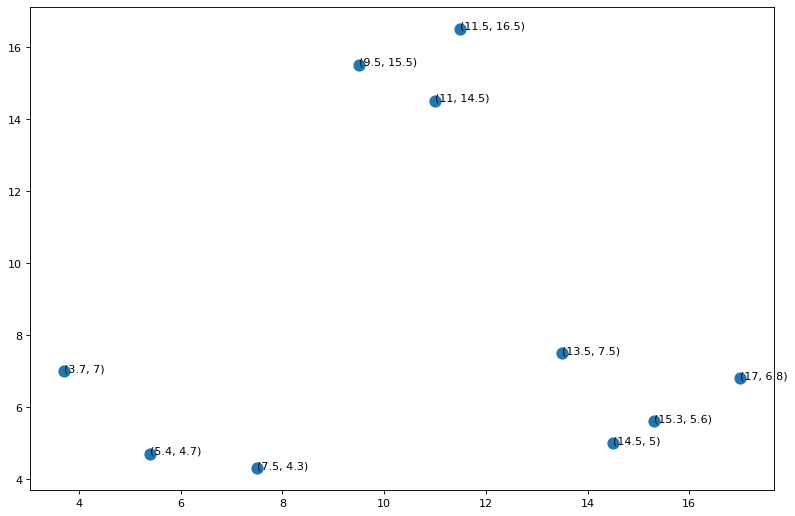

In [17]:
import matplotlib.pyplot as plt

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x,y, s=100)

for i, txt in enumerate(zip(x, y)):
    plt.annotate(txt, (x[i], y[i]))


In [20]:
import numpy as np
import pandas as pd
test=pd.DataFrame(x,columns=["x"])
test["y"] = y
test

,x,y
0,11.5,16.5
1,9.5,15.5
2,11.0,14.5
3,13.5,7.5
4,17.0,6.8
5,15.3,5.6
6,14.5,5.0
7,3.7,7.0
8,5.4,4.7
9,7.5,4.3


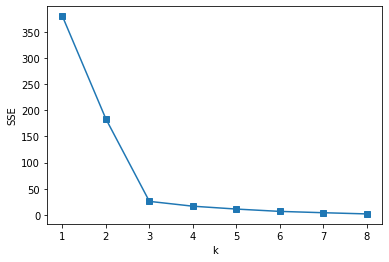

In [21]:
from sklearn.cluster import KMeans
X = test
SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [22]:
from sklearn.cluster import KMeans

n=3
# Создаем модель кластеризации
kmeans = KMeans(n_clusters=n)

# обучим нашу модель
kmeans.fit(X)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred


array([2, 2, 2, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

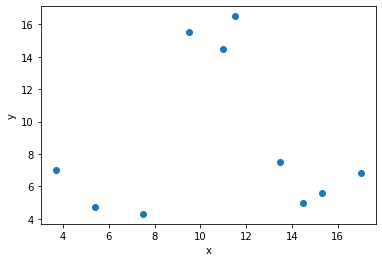

In [25]:
import matplotlib.pyplot as plt

plt.scatter(test['x'],test['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
X['cluster'] = Y_pred
X[X['cluster']==0]

,x,y,cluster
3,13.5,7.5,0
4,17.0,6.8,0
5,15.3,5.6,0
6,14.5,5.0,0


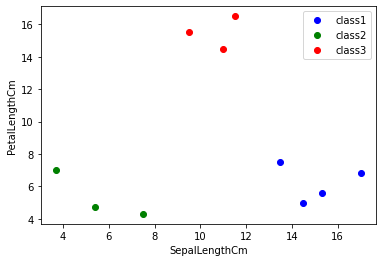

In [29]:
import matplotlib.pyplot as plt

# X[строки, столбцы]
# plt.plot(x,y)
plt.plot(X[X['cluster']==0]['x'], X[X['cluster']==0]['y'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['x'], X[X['cluster']==1]['y'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['x'], X[X['cluster']==2]['y'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()



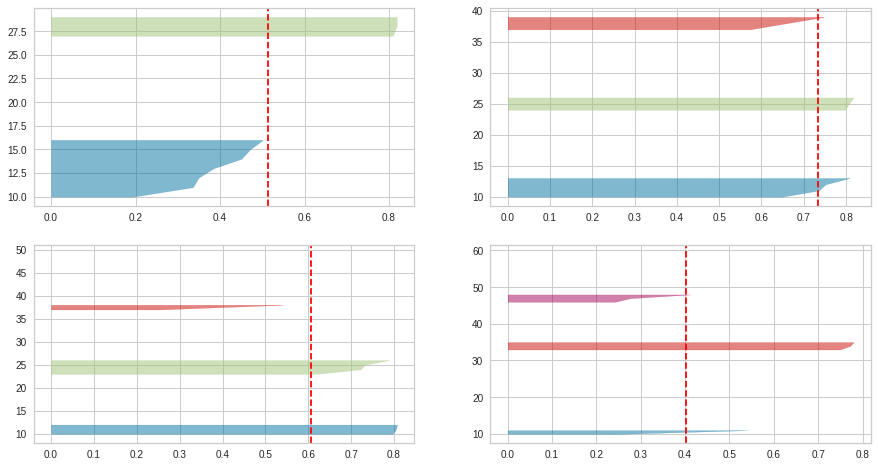

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(test)